<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>


<font size="5"></br> UE Introduction au Machine Learning: Project ML </font></br></div>
</CENTER>
<CENTER>
<font size="3"></br></font></br></div>
</CENTER>
<CENTER>
<span style="color:blue"></span>
</CENTER>

The objective of the project is to apply a Machine Learning model onto two different datasets:
- Banknote Authentication Dataset
- Chronic Kidney Disease:

Workflow : 

1. Import the dataset
2. Clean the data, perform pre-processing
I Replace missing values by average or median values
I Center and normalize the data
3. Split the dataset
I Split between training set and test set
I Split the training set for cross-validation
4. Train the model (including feature selection)
5. Validate the model
Objective: collaboratively implement this workflow and apply it to different ML problems/datasets


# Import Data 



In [53]:
import numpy as np
import scipy.io as sio
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *

Informations sur l'ensemble des données :

Les données ont été extraites d'images prises sur des spécimens de billets de banque authentiques et contrefaits. Pour la numérisation, une caméra industrielle habituellement utilisée pour l'inspection des imprimés a été utilisée. Les images finales ont 400x 400 pixels. En raison de l'objectif de l'objet et de la distance de l'objet étudié, des images en échelle de gris avec une résolution d'environ 660 dpi ont été obtenues. L'outil de transformation en ondelettes a été utilisé pour extraire les caractéristiques des images. 


In [54]:
data = pd.read_csv('./data/data_banknote_authentication.txt', sep=",", header=None)
data.columns = ["Variance of WTI","Skewness of WTI","Curtosis of WTI","Entropy of image","Class"]
data.describe()

# 1. variance de l'image transformée en ondelettes
# 2. asymétrie de l'image transformée en ondelettes
# 3. applatissement de l'image transformée en ondelettes 
# 4. entropie de l'image 
# 5. classe (nombre entier)  

,Variance of WTI,Skewness of WTI,Curtosis of WTI,Entropy of image,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [55]:
data_disease = pd.read_csv('./data/kidney_disease.csv', sep=",", header=0)
data_disease.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


1) You should first clean the dataset (handle missing values and  categorical values) and especially : 
- Replace missing values by average or median values
- Center and normalize the data

In [80]:
def count_NaN(data):
    no_NaN_data = data.notna()
    countNaN = np.zeros((np.shape(data)[1]))
    for k in range(np.shape(data)[1]):
        for i in range (np.shape(data)[0]):
            if no_NaN_data.iloc[i,k] == False:
                countNaN[k] +=1
    return countNaN

In [81]:
def replace_NaN(data):
    no_NaN_data = data
    mean_data = np.mean(data)
    count_replaced_values = np.zeros((np.shape(data)[1]))
    for k in data:
        for i in range (len(data[k])):
            va_k = no_NaN_data[k]
            if va_k[i] == np.NaN:
                count_replaced_values[k] += 1
                va_k[i] = mean_data[k] #replace with mean
    return no_NaN_data, count_replaced_values
    

In [82]:
#In practice we often ignore the shape of the distribution and just transform the data to center it by removing 
# the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

def center_and_normalize(data):
    center_and_normalize = data
    mean_data, std_data = np.mean(data), np.std(data)
    types_data = data.dtypes
    for k in center_and_normalize:
        if types_data[k] == float: #on se souhaite pas centrée réduire les labels
            center_and_normalize[k] = (center_and_normalize[k] - mean_data[k])*(1/std_data[k])
    return center_and_normalize


In [83]:
def clean_data(data):
    data_na=data.notna() #renvoie une dataframe booléen
    data_types=data.dtypes #datatype of each column
    # for k in data:
    #     for i in range(len(data_na[k])):
    #         #Il est possible que certains string aient des \t ou des " ", il faut les enlever
    #         if type(data[k][i])==str:
    #             data.at[i,k]=data[k][i].replace(" ","")
    #             data.at[i,k]=data[k][i].replace("\t","")
    #             #Si un des NaN avait ce genre de caractères alors ils n'étaient pas repérés et comptaient
    #             #Pour une valeur: On modifie donc la table data_na 
    #             if data[k][i]=="?":
    #                 data_na.at[i,k]=False
    for index in data:
        if data_types[index]==object:
            clear_data_String(data,index,data_na)
        else:
            if data_types[index]==int:
                clear_data_Float_Int(data,index,int)
            else:
                clear_data_Float_Int(data,index,float)
    data = center_and_normalize(data)
    replace_by_Int(data)
    return data

In [84]:
def clear_data_String(data,k,data_na):
    list_value={}
    data_na=data_na[k]
    for value in range(len(data_na)):
        if data_na[value]:
            if data[k][value] not in list_value:
                list_value[data[k][value]]=0
            else:
                list_value[data[k][value]]+=1
    moy,Max=data[k][0],0
    for value in list_value:
        if list_value[value]>Max:
            Max,moy=list_value[value],value
    for value in range(len(data)):
        if not data_na[value]:
            data.at[value,k]=moy

In [85]:
def clear_data_Float_Int(data,k,int_or_float):
    moy=data[k].mean()
    data_na=data[k].isna()
    if int_or_float==int:
        if moy-floor(moy)<0.5:
                moy=int(moy)
        else:
                moy=int(moy + 1)
    for value in range(len(data_na)):
        if data_na[value]:
            data.at[value,k]=moy

In [86]:
def replace_by_Int(data):
    data_types=data.dtypes #datatype of each column
    for k in data:
        if data_types[k]==object:
            list_value={}
            data_na=data[k].isna()
            number=0
            for value in range(len(data_na)):
                if not data_na[value]:
                    if data[k][value] not in list_value:
                        list_value[data[k][value]]=number
                        number+=1
                    data.at[value,k]=list_value[data[k][value]]
            data[k] = data[k].astype(int)

In [89]:
data_clean = clean_data(data)
data_disease_cleaned = clean_data(data_disease)

2. Split the dataset : 
- Split between training set and test set
- Split the training set for cross-validation

In [20]:
from sklearn.model_selection import train_test_split

#Faire aussi cross validation

def split_data(data, test_size):
    labels = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size)
    return X_train, X_test, y_train, y_test

You may implement feature selection: bruteforce, by looking at correlations, from an ACP (for classiffication)

In [22]:
#Assumption to check --> Data are gaussian distributed --> check with Shapiro Test

#En statistique, le test de Shapiro–Wilk teste l'hypothèse nulle selon laquelle un échantillon x 1 , … , x n 
#est issu d'une population normalement distribuée. 

from scipy.stats import shapiro
from sklearn.decomposition import PCA


def shapiro_test(data):
    n = np.shape(data)[1]
    p_values = np.zeros((n))
    for k in range(n):
        data_k = data.iloc[:,k]
        shapiro_test = shapiro(data_k)
        p_values[k] = shapiro_test.pvalue
    return p_values

shapiro_test(clean_data)


def pca(data):
    pca = PCA.fit(data)
    data_reduc = pca.transform(data)
    return data_reduc

# pca(clean_data)
    

# SVM Method

Cross Validation

In [23]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [24]:
clean_data
# clean_data[:,1]

vari, skew, curt, entr = clean_data["Variance of WTI"].to_numpy(),clean_data["Skewness of WTI"].to_numpy(),clean_data["Curtosis of WTI"].to_numpy(),clean_data["Entropy of image"].to_numpy()
# X = np.hstack((clean_data["Variance of WTI"],clean_data["Skewness of WTI"],clean_data["Curtosis of WTI"],clean_data["Entropy of image"]))
# X = np.concatenate((clean_data["Variance of WTI"],clean_data["Skewness of WTI"],clean_data["Curtosis of WTI"],clean_data["Entropy of image"]), axis=0)
X = np.vstack((vari.T, skew.T, curt.T, entr.T)).T
y = clean_data["Class"].to_numpy() #pls use clean_data.iloc[:,-1]
# clean_data
X.dtype

dtype('float64')

In [25]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold

def precision_recall_multilabels(y_true, y_pred, labels):
    recalls = []
    precisions = []
    for label in labels:

        pos_true = y_true == label
        pos_pred = y_pred == label

        # By hand
        true_pos = pos_pred & pos_true
        recalls.append(np.sum(true_pos) / np.sum(pos_true))
        precisions.append(np.sum(true_pos) / np.sum(pos_pred))

        # With sklearn
        # precisions.append(precision_score(pos_test, pos_pred))
        # recalls.append(recall_score(pos_test, pos_pred))

    return precisions, recalls


def kfold_precisions_recalls(X, y, labels, clf, kf: KFold):
    """Returns the history of precisions and recalls through K-fold training

    Parameters
    ----------
    X, y : data
    labels : list[int]
    clf : classifier
    kf : KFold instance

    Returns
    -------
    precisions : list[list], shape (num_folds, len(labels))
    recalls : list[list], shape (num_folds, len(labels))
    """
    precisions, recalls = [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        precisions_, recalls_ = precision_recall_multilabels(y_test, y_pred, labels)

        precisions.append(precisions_)
        recalls.append(recalls_)

    return precisions, recalls

In [26]:
# Once you have filled the `clfs_results` dictionnary below
# call `kfold_multimodels_report(clfs_results)`


def kfold_multimodels_report(clfs_results):
    """
    Prints a report for the results of experiments on multiple models,
    each one evaluated using k-fold cross-validation.

    The results of the experiments should be given as the 'clfs_stats'
    argument, with the following structure:

    {
        "clf_name1": {"metric1": list[list], "metric2": list[list], ...},
        "clf_name2": {"metric1": list[list], "metric2": list[list], ...},
        ...
    }

    with each list[list] being of shape (num_folds, num_classes).
    """
    clfs_stats = kfold_summarize_results(clfs_results)
    with np.printoptions(precision=2, floatmode="fixed"):
        for clf_name, clf_stats in clfs_stats.items():
            print(f"{clf_name:<15}")
            for metric_name, stats in clf_stats.items():
                print(f"{metric_name:>15}")
                for stat_name, data in stats.items():
                    print(f"{stat_name:>20}: {data}")


def kfold_summarize_results(clfs_results):
    """Computes stats on results of multi-models k-folds experiments.

    Takes:

    {
        "clf_name1": {"metric1": list[list], "metric2": list[list], ...},
        "clf_name2": {"metric1": list[list], "metric2": list[list], ...},
        ...
    }

    Returns:

    {
        "clf_name1": {"metric1": {"mean": value, "std": value ...}, ...},
        ...
    }
    """
    clfs_stats = {clf_name: {} for clf_name in clfs_results}
    for clf_name, clf_results in clfs_results.items():
        for metric, data in clf_results.items():
            clfs_stats[clf_name][metric] = {
                "mean": np.mean(data, axis=0),
                "std": np.std(data, axis=0),
            }
    return clfs_stats

In [27]:
classes_labels = [0, 1]

clf = svm.SVC()
train_size = 100
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, shuffle=True
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precisions, recalls = precision_recall_multilabels(y_test, y_pred, classes_labels)

print(f"{precisions = }")
print(f"{   recalls = }")

precisions = [1.0, 0.9706390328151986]
   recalls = [0.976056338028169, 1.0]


In [28]:
np.unique(y)

array([0, 1], dtype=int64)

In [29]:
num_classes = len(np.unique(y))
classes_labels = [0, 1]


clfs = {
    "linear": svm.SVC(kernel="linear", C=1.0),
    "poly2": svm.SVC(kernel="poly", C=1.0, degree=2, gamma="scale", coef0=0.0),
    # "poly3": svm.SVC(kernel="poly", C=1.0, degree=3, gamma="scale", coef0=0.0),
    # "poly4": svm.SVC(kernel="poly", C=1.0, degree=4, gamma="scale", coef0=0.0),
    "rbf": svm.SVC(kernel="rbf", C=1.0, gamma="scale"),
    # "sigmoid": svm.SVC(kernel="sigmoid", C=1.0, gamma="scale", coef0=0.0),
}

clfs_results = {clf_name: {"precisions": None, "recalls": None} for clf_name in clfs}

In [30]:
kf = KFold(n_splits=10, shuffle=True, random_state=34)

for clf_name, clf in clfs.items():
    precisions, recalls = kfold_precisions_recalls(X, y, classes_labels, clf, kf)

    clfs_results[clf_name]["precisions"] = precisions
    clfs_results[clf_name]["recalls"] = recalls

kfold_multimodels_report(clfs_results)

linear         
     precisions
                mean: [1.00 0.97]
                 std: [0.00 0.02]
        recalls
                mean: [0.97 1.00]
                 std: [0.02 0.01]
poly2          
     precisions
                mean: [0.75 0.81]
                 std: [0.04 0.06]
        recalls
                mean: [0.88 0.63]
                 std: [0.03 0.06]
rbf            
     precisions
                mean: [1.00 1.00]
                 std: [0.00 0.00]
        recalls
                mean: [1.00 1.00]
                 std: [0.00 0.00]


Text(0.5, 1.0, 'Prediction')

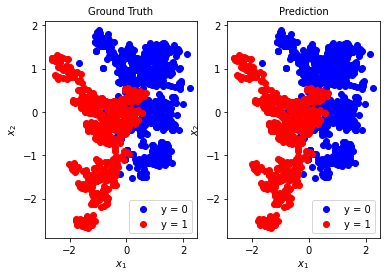

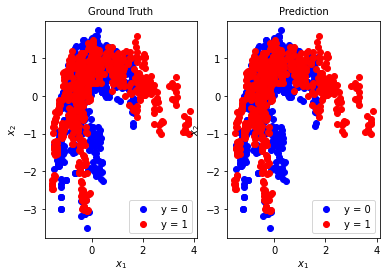

In [31]:
# Plot variables
x1,x2, x3, x4 = vari, skew, curt, entr
# X1, X2, X3, X4 = meshgrid(linspace(x1.min(), x1.max(), 10), linspace(x2.min(), x2.max(), 10), linspace(x3.min(), x3.max(), 10), linspace(x4.min(), x4.max(), 10))
# X_rav = vstack((ravel(X1), ravel(X2), ravel(X3), ravel(X4))).T
X1, X2 = linspace(x1.min(), x1.max(), 10), linspace(x2.min(), x2.max(), 10)
X_rav = vstack((linspace(x1.min(), x1.max(), 10), linspace(x2.min(), x2.max(), 10), linspace(x3.min(), x3.max(), 10), linspace(x4.min(), x4.max(),10))).T
# fig = plt.figure()
# gs = fig.add_gridspec(3,2)
# ax1,ax2,ax3,ax4,ax5 = fig.add_subplot(gs[0, :]), fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])
# axs=[ax2,ax3,ax4,ax5]
# depths=[1,2,3,4]

fig, (ax1,ax2) = plt.subplots(1,2)
y_pred = clf.predict(X)

# Plot Ground Truth
ax1.scatter(x1[y==0], x2[y==0], c='b')
ax1.scatter(x1[y==1], x2[y==1], c='r')
# plt.contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
ax1.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax1.set_xlabel("$x_1$", fontsize=10)
ax1.set_ylabel("$x_2$", fontsize=10)
ax1.set_title('Ground Truth', size=10)
ax2.scatter(x1[y_pred==0], x2[y_pred==0], c='b')
ax2.scatter(x1[y_pred==1], x2[y_pred==1], c='r')
# plt.contourf(X1, X2, clf.predict(X_rav), cmap='bwr', alpha=0.5)
ax2.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax2.set_xlabel("$x_1$", fontsize=10)
ax2.set_ylabel("$x_2$", fontsize=10)
ax2.set_title('Prediction', size=10)

fig, (ax1,ax2) = plt.subplots(1,2)
y_pred = clf.predict(X)

# Plot Ground Truth
ax1.scatter(x3[y==0], x4[y==0], c='b')
ax1.scatter(x3[y==1], x4[y==1], c='r')
# plt.contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
ax1.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax1.set_xlabel("$x_1$", fontsize=10)
ax1.set_ylabel("$x_2$", fontsize=10)
ax1.set_title('Ground Truth', size=10)
ax2.scatter(x3[y_pred==0], x4[y_pred==0], c='b')
ax2.scatter(x3[y_pred==1], x4[y_pred==1], c='r')
# plt.contourf(X1, X2, clf.predict(X_rav), cmap='bwr', alpha=0.5)
ax2.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax2.set_xlabel("$x_1$", fontsize=10)
ax2.set_ylabel("$x_2$", fontsize=10)
ax2.set_title('Prediction', size=10)
